<a href="https://colab.research.google.com/github/abhatia903/Concept_Drift_Data/blob/main/Labeling_of_Ganga_Data_USing_Ph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [61]:
!pip install river

In [62]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ganga_data.csv")

In [63]:
col='Date'

In [64]:
df[col]=pd.to_datetime(df[col],errors='coerce',format='%d-%m-%y %H:%M')

In [65]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [66]:
t2019=df[df['year']==2019]

In [67]:
df_half1=t2019[t2019['month']<=8]

In [68]:
t_st=t2019[t2019['month']>8]

In [69]:
t2020=df[df['year']==2020]

In [70]:
t_st.append(t2020)

,Date,Frame No,BAT,COND,DO,ORP,PH,WT,year,month,day
17012,2019-09-01 16:07:00,0,83.0000,288.0869,12.1060,0.1141,8.3441,27.0278,2019,9,1
17013,2019-09-01 16:08:00,1,96.0000,287.3553,12.1060,0.1130,8.6119,26.9565,2019,9,1
17014,2019-09-01 16:09:00,2,98.0000,287.3553,12.1060,0.1126,8.6395,26.9589,2019,9,1
17015,2019-09-01 16:10:00,3,83.0000,288.0829,12.1060,0.1126,8.6667,26.9603,2019,9,1
17016,2019-09-01 16:11:00,4,96.0000,287.4204,12.1060,0.1125,8.6152,26.9615,2019,9,1
...,...,...,...,...,...,...,...,...,...,...,...
46978,2020-03-05 17:40:00,193,87.0000,721.8673,10.0086,0.1163,9.3776,27.1307,2020,3,5
46979,2020-03-05 17:41:00,194,85.0000,722.1170,10.0086,0.1163,9.3750,27.1423,2020,3,5
46980,2020-03-05 17:42:00,195,80.0000,722.0287,10.0086,0.1162,9.3758,27.1400,2020,3,5
46981,2020-03-05 17:43:00,196,81.0000,721.9607,10.0086,0.1162,9.3802,27.1350,2020,3,5


In [71]:
df_half2=t_st

In [72]:
k=df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ganga_data.csv")

In [73]:
main_data=k.iloc[:,[2,3,4,5,7]]

In [74]:
df['Target']=1

In [75]:
df

,Date,Frame No,BAT,COND,DO,ORP,PH,WT,Target
0,12-01-19 12:57,0,91.0000,0.0447,14.8328,0.0848,8.8797,22.6502,1
1,12-01-19 12:58,1,92.0000,0.0447,14.1703,0.0863,8.8668,22.5670,1
2,12-01-19 14:54,0,90.0000,46.1952,13.5012,0.1429,12.3599,18.4008,1
3,12-01-19 14:55,1,91.0000,52.6097,20.7529,0.1462,12.8257,18.0136,1
4,12-01-19 14:56,2,91.0000,52.3998,12.4094,0.1467,12.9990,18.1846,1
...,...,...,...,...,...,...,...,...,...
46978,05-03-20 17:40,193,87.0000,721.8673,10.0086,0.1163,9.3776,27.1307,1
46979,05-03-20 17:41,194,85.0000,722.1170,10.0086,0.1163,9.3750,27.1423,1
46980,05-03-20 17:42,195,80.0000,722.0287,10.0086,0.1162,9.3758,27.1400,1
46981,05-03-20 17:43,196,81.0000,721.9607,10.0086,0.1162,9.3802,27.1350,1


In [76]:
from scipy import stats

p_value = 0.05

rejected = 0

for col in main_data :

    test = stats.ks_2samp(df_half1[col], df_half2[col])

    if test[1] < p_value:

         rejected += 1

         print("Column rejected", col)

print("We rejected",rejected,"columns in total")

Column rejected BAT
Column rejected COND
Column rejected DO
Column rejected ORP
Column rejected WT
We rejected 5 columns in total


In [77]:
import numpy as np

In [78]:
from river.drift import PageHinkley
np.random.seed(12345)
ph = PageHinkley(threshold=20,min_instances=10)
# Update drift detector and verify if change is detected
for col in main_data:
  data_stream=[]
  a = np.array(df_half1[col])
  b = np.array(df_half2[col])
  data_stream = np.concatenate((a,b))
  for i, val in enumerate(data_stream):
     in_drift, in_warning = ph.update(val)
     if in_drift:
           df.loc[i, 'Target']=0
           print(f"Change detected at index {i} for column: {col} with input value: {val}")

Change detected at index 75 for column: BAT with input value: 97.0
Change detected at index 153 for column: BAT with input value: 96.0
Change detected at index 1745 for column: BAT with input value: 98.0
Change detected at index 1837 for column: BAT with input value: 98.0
Change detected at index 3960 for column: BAT with input value: 98.0
Change detected at index 4049 for column: BAT with input value: 98.0
Change detected at index 5132 for column: BAT with input value: 96.0
Change detected at index 7737 for column: BAT with input value: 96.0
Change detected at index 8055 for column: BAT with input value: 96.0
Change detected at index 10601 for column: BAT with input value: 96.0
Change detected at index 10694 for column: BAT with input value: 98.0
Change detected at index 10904 for column: BAT with input value: 94.0
Change detected at index 13091 for column: BAT with input value: 97.5
Change detected at index 14959 for column: BAT with input value: 100.0
Change detected at index 16721 

In [79]:
df[df['Target']==0]

,Date,Frame No,BAT,COND,DO,ORP,PH,WT,Target
0,12-01-19 12:57,0,91.0000,0.0447,14.8328,0.0848,8.8797,22.6502,0
73,30-03-19 10:26,1,96.0000,1.0192,108.9844,0.0912,9.9720,29.8488,0
75,30-03-19 10:28,3,97.0000,1.0192,109.0427,0.0896,9.9655,29.6390,0
93,30-03-19 12:26,3,85.0000,392.5021,108.4776,0.1181,14.2798,29.3952,0
102,30-03-19 12:35,12,85.0000,392.2403,108.7485,0.0889,14.0748,29.2978,0
...,...,...,...,...,...,...,...,...,...
37896,30-12-19 23:37,93,96.0000,395.6995,19.2422,0.1103,7.9254,16.2342,0
37965,31-12-19 0:47,162,97.0000,395.7903,19.2422,0.1106,7.9111,16.1933,0
38049,31-12-19 2:13,246,97.0000,395.8819,19.2422,0.1107,7.8882,16.1383,0
38160,31-12-19 4:06,101,97.0000,395.4441,19.2422,0.1103,7.9420,16.0558,0


In [80]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(main_data)

In [81]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
# create dataset
X, y = dataset,df['Target']
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=17)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31478, 5) (15505, 5) (31478,) (15505,)


In [82]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [83]:
pip install tensorflow_addons

In [84]:
import tensorflow_addons as tfa

In [85]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
      
]

Epoch 1/10
984/984 [==============================] - 9s 5ms/step - loss: 0.0326 - tp: 30906.0000 - fp: 394.0000 - tn: 1.0000 - fn: 177.0000 - accuracy: 0.9819 - precision: 0.9874 - recall: 0.9943 - auc: 0.4458 - prc: 0.9854 - val_loss: 0.0134 - val_tp: 15296.0000 - val_fp: 209.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.9865 - val_precision: 0.9865 - val_recall: 1.0000 - val_auc: 0.3321 - val_prc: 0.9804
Epoch 2/10
984/984 [==============================] - 4s 4ms/step - loss: 0.0129 - tp: 31083.0000 - fp: 395.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.9875 - precision: 0.9875 - recall: 1.0000 - auc: 0.4540 - prc: 0.9861 - val_loss: 0.0135 - val_tp: 15296.0000 - val_fp: 209.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.9865 - val_precision: 0.9865 - val_recall: 1.0000 - val_auc: 0.4716 - val_prc: 0.9857
Epoch 3/10
984/984 [==============================] - 5s 5ms/step - loss: 0.0127 - tp: 31083.0000 - fp: 395.0000 - tn: 0.0000e+00 - fn

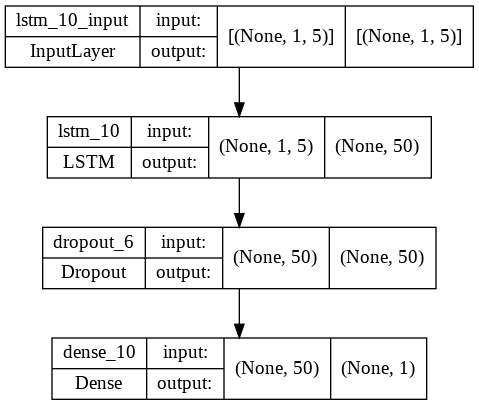

In [86]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.8))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', 
              optimizer='adam', metrics=METRICS)

history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test), verbose=1)

model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [87]:
train_predict = model.predict(X_train)




In [88]:
train_predict

array([[0.9999994],
       [0.9999995],
       [0.9999867],
       ...,
       [0.9999988],
       [0.9999989],
       [0.9999996]], dtype=float32)

In [89]:
X_train

array([[[0.65384615, 0.56879935, 0.06947251, 0.50148381, 0.92536168]],

       [[0.61538462, 0.38288149, 0.3829019 , 0.70280647, 0.77507125]],

       [[0.53846154, 0.00125515, 0.56730951, 0.03504765, 0.78058958]],

       ...,

       [[0.23076923, 0.88938902, 0.0376899 , 0.49030384, 0.72125508]],

       [[0.53846154, 0.66601733, 0.16305963, 0.37886548, 0.73255793]],

       [[0.61538462, 0.38283601, 0.4519492 , 0.64743069, 0.82008268]]])

In [90]:
loss,tp,fp,tn,fn,accuracy,precision, recall,auc,prc = model.evaluate(X_test, y_test, verbose=0)

In [94]:
f1score=(2*precision*recall)/(precision+recall)
f1score

0.9932145019291873